# Green OA Analysis


Now with a fully constructed CSV file can see what we are up against.

Caveats to this point
- `Journal Article` with a `DOI`
- `ORCID` with a `current affiliation` of Brock University
- Policy Finder indicated that `institutional repository` was an option for a policy

## Dataframes built


|Variable Name | Contents |
|-----|-----|
|`doi_df`|ORCID + DOI + Policy Finder with caveats above|
|`doi_green_eligible`| ORCID + DOI + Policy Finder with caveats above, not already open access|
|`doi_green_eligible_free`| ORCID + DOI + Policy Finder with caveats above, not alreaddy open access, with at least one free pathway|


In [2]:
# @title CSV input

csv_url = "https://raw.githubusercontent.com/elibtronic/green_oa_compiler/refs/heads/main/Brock_ORCID_Harvest_Start_Date_2025-01-01_to_2025-08-26.csv" # @param {"type":"string","placeholder":"https://raw.githubusercontent.com/elibtronic/green_oa_compiler/refs/heads/main/Brock_ORCID_Harvest_Start_Date_2025-01-01_to_2025-07-21.csv"}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#all augmented data
doi_df = pd.read_csv(csv_url)

#items with some sort of pathway not already OA
doi_green_eligible = doi_df[doi_df['submitted_oa_policy'].notnull() | doi_df['accepted_oa_policy'].notnull() | doi_df['published_oa_policy'].notnull()]
doi_green_eligible = doi_green_eligible[doi_green_eligible['standard_url'] != "creativecommons.org"]
doi_green_eligible.reset_index()

#eligible with at least 1 free route
doi_green_eligible_free = doi_green_eligible[doi_green_eligible['submitted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['accepted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['published_oa_policy'].str.contains('fee_no', case=False)]
doi_green_eligible_free.reset_index()

print("Done Loading and creating Dataframes")

Done Loading and creating Dataframes


In [3]:
#I can probably get rid of LICENSE_URL
doi_green_eligible_free.sample(10)

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
279,0000-0001-7289-2675,10.1139/cjb-2025-0071,1916-2790,http://www.nrcresearchpress.com/page/about/Cor...,www.nrcresearchpress.com,https://v2.sherpa.ac.uk/id/publication/10124,8195:fee_no:no conditions;,3875:fee_no:Publisher copyright and source mus...,NaN
490,0000-0003-1476-2965,10.1108/JOEPP-09-2015-0033,2051-6614,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/28006,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN
661,0000-0003-4638-5586,10.1139/cjpp-78-7-541,1205-7541,No URL retrieved,NaN,https://v2.sherpa.ac.uk/id/publication/10133,8195:fee_no:no conditions;,3875:fee_no:Publisher copyright and source mus...,NaN
365,0000-0003-1476-2965,10.1108/ijebr-02-2021-0154,1355-2554,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/2724,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN
339,0000-0003-1476-2965,10.1108/ijebr-12-2021-1056,1355-2554,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/2724,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN
352,0000-0003-1476-2965,10.1108/joepp-11-2022-0315,2051-6614,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/28006,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN
342,0000-0003-1476-2965,10.1111/1467-8551.12573,1045-3172,http://onlinelibrary.wiley.com/termsAndConditi...,onlinelibrary.wiley.com,https://v2.sherpa.ac.uk/id/publication/7619,11212:fee_no:May not be updated with Publisher...,11213:fee_no:Publisher source must be acknowle...,NaN
498,0000-0003-1476-2965,10.1111/apps.12006,0269-994X,http://doi.wiley.com/10.1002/tdm_license_1.1,doi.wiley.com,https://v2.sherpa.ac.uk/id/publication/3616,11204:fee_no:Must acknowledge acceptance for p...,NaN,NaN
459,0000-0003-1476-2965,10.1108/pr-02-2018-0052,0048-3486,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/2971,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN
401,0000-0003-1476-2965,10.1108/joepp-05-2021-0121,2051-6614,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/28006,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN


# Subset Data Frames

# Series



In [4]:
#Anything useful we can see by looking at URLs of Licenses?
doi_df.value_counts('standard_url')

,count
standard_url,
creativecommons.org,206
www.elsevier.com,86
www.emerald.com,78
onlinelibrary.wiley.com,54
journals.sagepub.com,45
www.springer.com,37
www.springernature.com,34
www.nrcresearchpress.com,24
doi.org,22


In [5]:
#What journal show up a lot here?
doi_df.value_counts('issn')

,count
issn,
0048-3486,27
1715-5312,20
8750-7587,18
1833-3672,16
1530-0315,14
...,...
0008-4204,1
0008-4077,1
0006-3223,1


In [6]:
#Frequency of authors?
doi_df.value_counts('ORCID')

,count
ORCID,
0000-0003-1476-2965,260
0000-0002-5449-3352,152
0000-0001-6203-5338,59
0000-0002-1577-2658,51
0009-0007-6904-959X,25
...,...
0009-0008-1923-4786,1
0009-0008-7681-5843,1
0009-0009-2327-7890,1


In [7]:
#Will caching DOI's help? -> No
doi_df['DOI'].value_counts()

,count
DOI,
10.1007/BF00423119,1
10.1139/cjps-2024-0160,1
10.1108/JHOM-02-2023-0036,1
10.1029/2023JE008184,1
10.1126/sciadv.adr2613,1
...,...
10.33137/cjal-rcbu.v11.44650,1
10.58188/1941-8043.1920,1
10.1123/jpah.2024-0225,1



# Magnitudes

In [8]:
#Items missing licenses from DOI
print(doi_df.eval(['LICENSE_URL == "No URL retrieved"']).sum())

328


In [9]:
#items missing issns
print(doi_df.eval(['issn == "No ISSN found"']).sum())

13


In [10]:
#Items already OA
doi_df.eval(['standard_url == "creativecommons.org"']).sum()

206

In [11]:
#Items with free pathways
doi_green_eligible[doi_green_eligible['submitted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['accepted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['published_oa_policy'].str.contains('fee_no', case=False)][['DOI']].count()

,0
DOI,186


In [12]:
# Items with no policy data
doi_df[doi_df['submitted_oa_policy'].isnull() & doi_df['accepted_oa_policy'].isnull() & doi_df['published_oa_policy'].isnull()][['DOI']].count()

,0
DOI,400


# Graphs

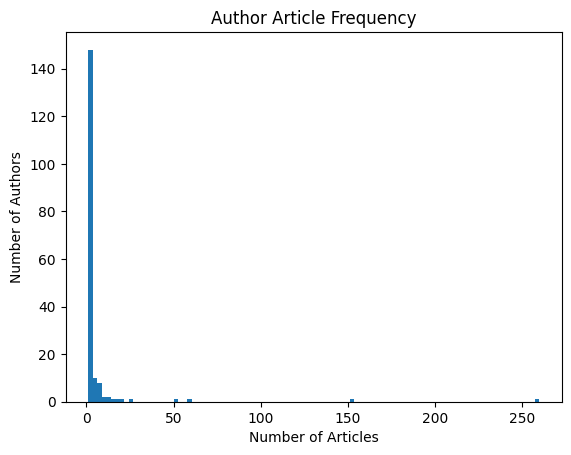

In [13]:
plt.hist(doi_df['ORCID'].value_counts(), bins=100)
plt.title("Author Article Frequency")
plt.xlabel("Number of Articles")
plt.ylabel("Number of Authors")
plt.show()

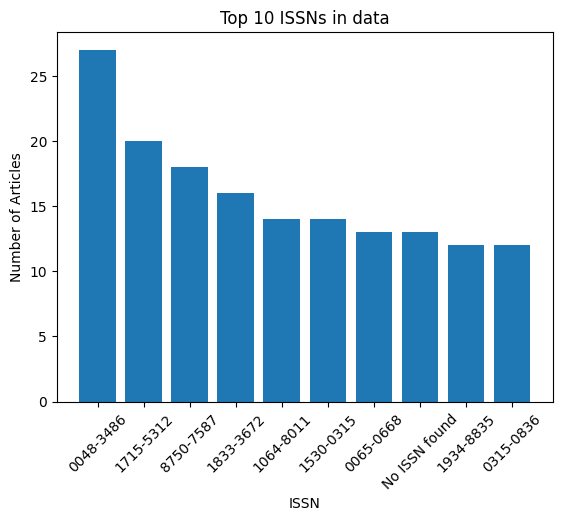

In [14]:
plt.bar(doi_df['issn'].value_counts().index[:10], doi_df['issn'].value_counts().values[:10])
plt.title("Top 10 ISSNs in data")
plt.ylabel("Number of Articles")
plt.xlabel("ISSN")
plt.xticks(rotation=45)
plt.show()